In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ppdd = pd.read_csv("https://raw.githubusercontent.com/rm0anand/ppdd/main/post%20natal%20data.csv")

In [ ]:
ppdd.drop('Timestamp', axis=1, inplace=True)

In [ ]:
ppdd =ppdd.dropna(axis=0)
# To clean column name
ppdd.columns = ppdd.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
ppdd =ppdd.dropna(axis=0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ppdd['irritable_towards_baby_and_partner'] = le.fit_transform(ppdd['irritable_towards_baby_and_partner'])
ppdd['trouble_sleeping_at_night'] = le.fit_transform(ppdd['trouble_sleeping_at_night'])
ppdd['problems_concentrating_or_making_decision'] = le.fit_transform(ppdd['problems_concentrating_or_making_decision'])
ppdd['overeating_or_loss_of_appetite'] = le.fit_transform(ppdd['overeating_or_loss_of_appetite'])
ppdd['feeling_anxious'] = le.fit_transform(ppdd['feeling_anxious'])
ppdd['problems_of_bonding_with_baby'] = le.fit_transform(ppdd['problems_of_bonding_with_baby'])
ppdd['suicide_attempt'] = le.fit_transform(ppdd['suicide_attempt'])
ppdd['feeling_of_guilt'] = le.fit_transform(ppdd['feeling_of_guilt'])
ppdd['feeling_sad_or_tearful'] = le.fit_transform(ppdd['feeling_sad_or_tearful'])
ppdd['age'] = le.fit_transform(ppdd['age'])

In [ ]:
from sklearn.model_selection import train_test_split
y = ppdd.feeling_anxious

ppdd_features = ppdd[['problems_of_bonding_with_baby', 'problems_concentrating_or_making_decision', 'age', 'irritable_towards_baby_and_partner', 'suicide_attempt']]
X= ppdd_features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1192 entries, 1115 to 1134
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   problems_of_bonding_with_baby              1192 non-null   int64
 1   problems_concentrating_or_making_decision  1192 non-null   int64
 2   age                                        1192 non-null   int64
 3   irritable_towards_baby_and_partner         1192 non-null   int64
 4   suicide_attempt                            1192 non-null   int64
dtypes: int64(5)
memory usage: 55.9 KB
None


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.0001,  0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.6661263668647376


In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(penalty='l1',C=0.1, solver='saga')
logistic_classifier.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [ ]:
logistic_classifier.score(X_train, y_train)

0.6510067114093959

In [ ]:
logistic_classifier.score(X_test, y_test)

0.7157190635451505

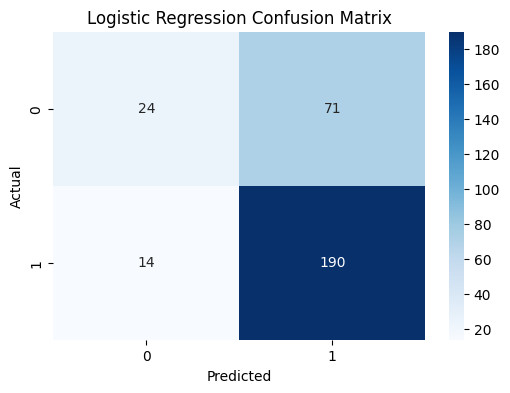

Accuracy: 0.7157190635451505
Precision: 0.7279693486590039
Recall: 0.9313725490196079
F1 Score: 0.8172043010752689


In [ ]:
# Make predictions on the test set
y_pred_lr = logistic_classifier.predict(X_test)

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Evaluation metrics
accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)
precision_lr = metrics.precision_score(y_test, y_pred_lr)
recall_lr = metrics.recall_score(y_test, y_pred_lr)
f1_lr = metrics.f1_score(y_test, y_pred_lr)

print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)

In [ ]:
('nn', MLPClassifier(hidden_layer_sizes=(100, 50),activation='relu', max_iter=500, random_state=42))
